In [0]:
#downloading essential libraries
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
from torchvision.datasets.mnist import MNIST
#downloading the train and test data and storing in a folder 
data_train = MNIST('./data/mnist',
                   download=True,
                   transform=transforms.Compose([
                       transforms.Resize((32, 32)),
                       transforms.ToTensor()]))

data_test = MNIST('./data/mnist',
                  train=False,
                  download=True,
                  transform=transforms.Compose([
                      transforms.Resize((32, 32)),
                      transforms.ToTensor()]))


Extracting ./data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw


Extracting ./data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw


Extracting ./data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw




Extracting ./data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw
Processing...
Done!


In [0]:
batch_size = 128
trainloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, shuffle=False)

In [0]:
# MNIST Data has gray images so channels will be equal to 1. The size of the image would be (1x32x32)
# Using ReLU Activation Function
class LeNet_mnist(nn.Module):
    def __init__(self): 
        super(LeNet_mnist, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5),         # (N, 1, 32, 32) -> (N,  6, 28, 28)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
#define a class object
net = LeNet_mnist().to(device)
#loss function
loss_fn = nn.CrossEntropyLoss()
#optimizer
opt = optim.Adam(net.parameters(), lr=2e-3,weight_decay=1e-5)

Epoch: 0/10, Test acc: 96.63, Train acc: 96.63
Epoch: 1/10, Test acc: 97.57, Train acc: 97.57
Epoch: 2/10, Test acc: 98.39, Train acc: 98.39
Epoch: 3/10, Test acc: 98.66, Train acc: 98.66
Epoch: 4/10, Test acc: 98.86, Train acc: 98.86
Epoch: 5/10, Test acc: 99.14, Train acc: 99.14
Epoch: 6/10, Test acc: 99.15, Train acc: 99.15
Epoch: 7/10, Test acc: 99.44, Train acc: 99.44
Epoch: 8/10, Test acc: 99.48, Train acc: 99.48
Epoch: 9/10, Test acc: 99.46, Train acc: 99.46


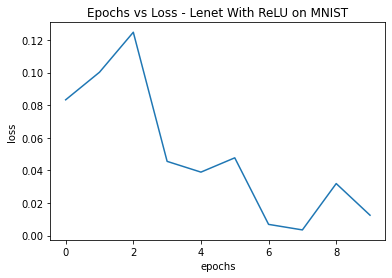

CPU times: user 2min 55s, sys: 1.34 s, total: 2min 56s
Wall time: 2min 57s


In [8]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Epochs vs Loss - Lenet With ReLU on MNIST")
plt.show()

In [9]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 99.46, Train acc: 99.46


In [0]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)

In [12]:
example_data.shape

torch.Size([128, 1, 32, 32])

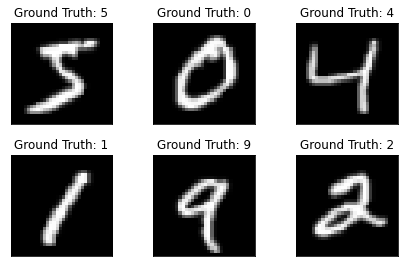

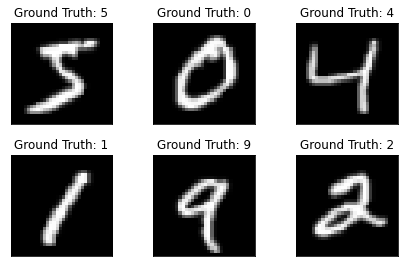

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig